In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [25]:
# Put the csv into a dataframe
df = pd.read_csv('Housing.csv')

df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [31]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

         price  area  bedrooms  bathrooms  stories  parking
count      545   545       545        545      545      545
mean   4766729  5151         3          1        2        1
std    1870440  2170         1          1        1        1
min    1750000  1650         1          1        1        0
25%    3430000  3600         2          1        1        0
50%    4340000  4600         3          1        2        0
75%    5740000  6360         3          2        2        1
max   13300000 16200         6          4        4        3


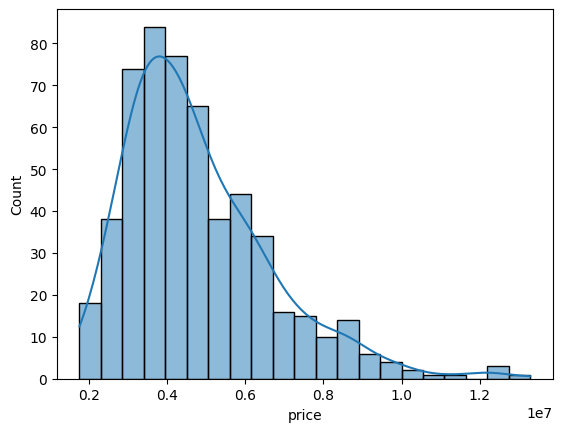

In [20]:

# Show the summary stats
pd.options.display.float_format = '{:.0f}'.format
print(df.describe())

# Visualize the price
sns.histplot(df['price'], kde = True)
plt.show()


In [34]:
columns_to_encode = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
df = df.drop(columns = columns_to_encode)



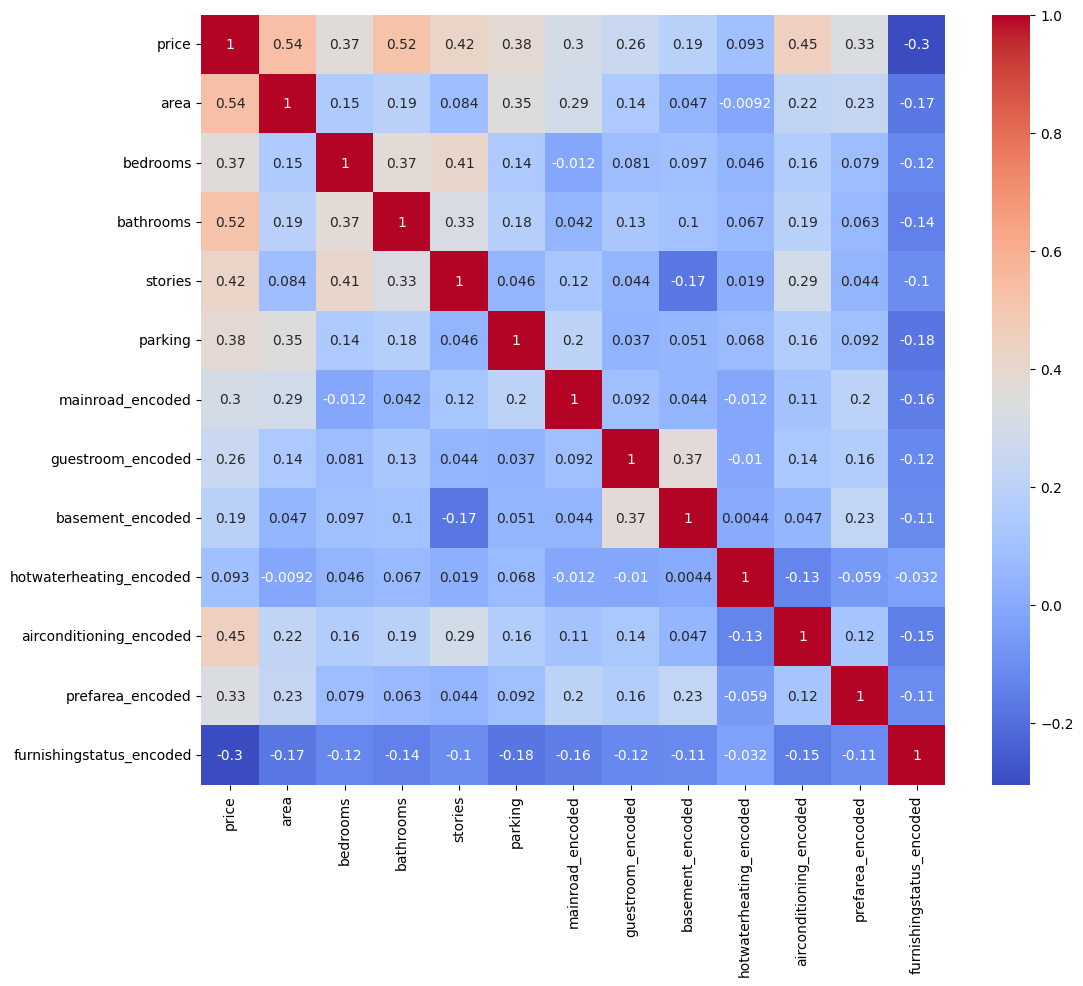

In [35]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [37]:
# Split data into features (X) and target (y)
# X: Input features (Dataframe or array) , y: Target variable
# random_state makes the split reproducable
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Root Mean Square Deviation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  1331071.4167895103


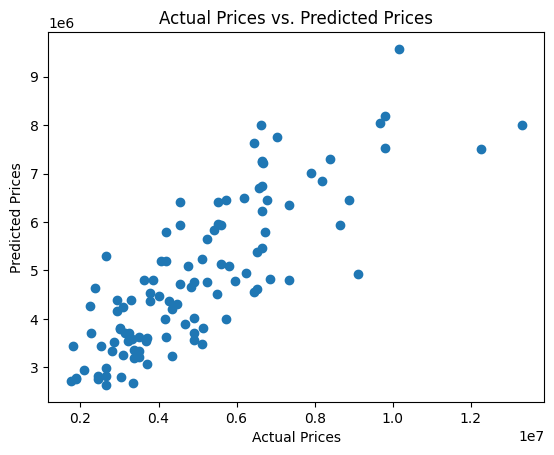

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()
